# Problem 3. PreTraining

Read the paper ”Training Compute-Optimal Large Language Models” Hoffmann et al. [2022] carefully and answer the following questions. For each question, provide specific evidence and citations from the paper to support your answer.

Note: Your answers should be specific and include relevant numerical evidence where appropriate. For each answer, clearly indicate which sections or tables of the paper you are referencing to support your arguments

1. **(5 points)** The paper presents three different approaches to determine the optimal trade-off between
model size and number of training tokens. For Approach 2 (IsoFLOP profiles), what were the exponents
a and b found for the relationships $N_{opt} ∝ $C_a$ and $D_{opt} ∝C_b$? How do these values differ from Kaplan
et al.’s findings, and what is the practical implication of this difference for training large language
models?




**Answer:** 
In this paper, the authors aim to determine the optimal trade-off between model size and the number of training tokens under a fixed compute budget. To this end, they present three approaches: (1) Minimum over training curves, (2) IsoFLOP profiles, and (3) Parametric modeling of the loss. According to Table 2, the second method, IsoFLOP profiles, yields the following scaling exponents for the optimal model size (N_opt) and optimal training tokens (D_opt) as functions of compute (C):
- Coeff. a = 0.49
- Coeff. b = 0.51 

In contrast, Kaplan et al. (2020) reported much more unbalanced scaling coefficients:
- Coeff. a = 0.73
- Coeff. b = 0.27

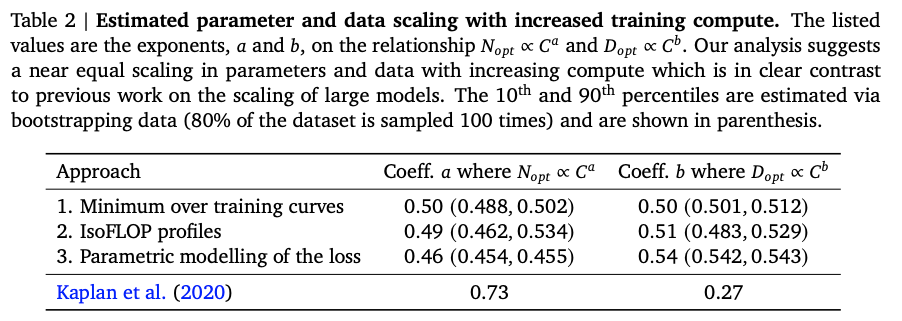

This means that, unlike Kaplan’s findings, where model size was expected to grow much faster than data, the new results suggest that model size and training data should scale almost equally with compute. In other words, compute-optimal training requires both model capacity and data quantity to increase at roughly the same rate.

Sections 1, 4, and 5 of the paper highlight that this finding fundamentally shifts how we think about large-scale language model training.
Rather than training increasingly large models for a limited number of tokens, the results imply that training smaller models for longer on more data is actually more efficient for a fixed compute budget. Under Kaplan’s scaling law, most existing LLMs are undertrained, they contain far more parameters than the available data can effectively support, leading to suboptimal performance. By contrast, the Chinchilla scaling law proposed in this study demonstrates that with the same compute budget, a smaller model trained on more data (Chinchilla: 70B parameters, 1.4T tokens) can outperform a much larger model trained on less data (Gopher: 280B parameters, 300B tokens). This also results in lower inference and fine-tuning costs due to the smaller model size.

In summary, these findings emphasize that compute efficiency depends not only on model scaling but also on adequate data scaling.
Optimally balanced models like Chinchilla achieve better downstream performance and are more practical to deploy, given their reduced memory footprint and inference cost.

<!-- 이 논문에서는 주어진 컴퓨팅 예산 하에서 최적의 모델 크기와 훈련 토큰 수 간의 trade-off을 결정하기 위해 (1) Minimum over training curves, (2) IsoFLOP profiles (3) Parametric modeling of the loss 와 같은 세가지 접근법을 제시하였다. Table 2에 따르면, 두번째 접근법인 IsoFLOP profiles을 통해 도출된 최적 모델 크기 (N_opt)와 최적 훈련 토큰 수 (D_opt)가 컴퓨팅 예산 (C)에 따라 스케일링되는 관계에서 발견된 지수 a와 b의 값은 다음과 같다.
- Coeff. a = 0.49
- Coeff. b = 0.51

반면에 Table 2에 따르면, Kaplan et al. (2020)의 기존 scaling의 coefficient는 각각 다음과 같다
- Coeff. a = 0.73
- Coeff. b = 0.27
본 논문의 approach 2에서는 지수 a와 b가 각각 약 0.5로, 모델 크기와 훈련 토큰 수가 컴퓨팅 예산에 따라 거의 동등한 비율로 증가해야함을 시사하는 반면에, Kaplan et al.은 지수 a와 b가 각각 0.73, 0.27로, 컴퓨팅 예산이 증가할 때 모델 크기 (N)을 훈련 데이터양(D)보다 훨씬 빠르게 확장해야함을 시사한다.

Section 1, 4, 5에 따르면 이러한 차이점은, LLM 훈련에서 scaling up하는 방식에서 벗어나, 컴퓨팅 예산에 맞추어 더 많은 데이터로 오래 훈련하는 training longer on more data 전략으로 전환해야한다는 practical implication을 제시한다. Specifically, Kaplan et al.의 scaling 법칙을 따랐던 기존의 LLM은 대부분 모델 parameter는 매우 크지만, 훈련 데이터가 부족하여 컴퓨팅 예산 대비 성능이 최적화 되지 않은, 상당히 덜 훈련된 상태였음 시사한다. 따라서, 주어진 컴퓨팅 예산에서 최적의 성능을 달성하기 위해서는, 모델 크기를 지나치게 키우기보다는 모델 크기와 훈련데이터를 균형있게 확장해야하며, 이러한 approach를 기반으로 훈련된 Chinchilla는 동일한 컴퓨팅 예산을 사용한 Gopher보다 4배 작으면서도 대부분의 다운스트림 작업에서 일관되게 우수한 성능을 보였다. 최적의 모델 크기가 작아지기 때문에, inference 및 fine-tuning 비용이 크게 절감되어 다운스트림 활용이 훨씬 용이해지는 이점이 있다. -->

2. (5 points) For a given compute budget of $576 \times 10^{23}$ FLOPs (same as Gopher), what is the optimal model size and number of training tokens according to the paper's analysis? Compare this to Gopher's actual configuration.



**Answer:** According to Table 3 in Hoffmann et al., for a compute budget of 576 x 10^23 FLOPs (equivalent to Gopher's compute budget),  the compute-optimal configuration is:
- Optimal Model Size: 67 billion parameters
- Optimal Number of Training tokens: 1.5 trillion tokens

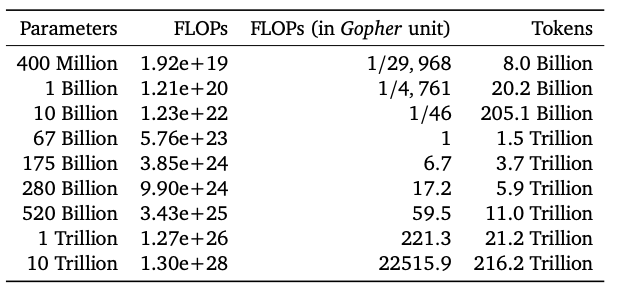

(1 Gopher unit = 576 x 10^23 FLOPs)

In conparison, according to Table 1, the actual configuration of Gopher was:
- Model size: 280 billion parameters
- Number of Training Tokens: 300 billion tokens

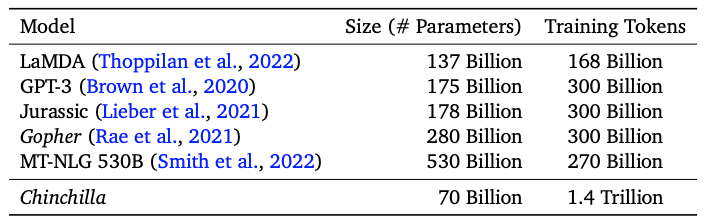

This comparison shows that Gopher was over-sized for its compute budget, using about four times more parameters but five times fewer training tokens than the compute-optimal configuration.

3. (5 points) Did Chinchilla's improvements in performance come at a higher computational cost compared to Gopher? Explain your answer using evidence from the paper about compute budget and model efficiency.



**Answer:** No, Chinchilla’s performance improvements did not come from higher computational cost.

According to Hoffmann et al. (2022), both Chinchilla (70B parameters, 1.4T tokens) and Gopher (280B parameters, 300B tokens) were trained with approximately the same compute budget of about 5.76 x 10^23 FLOPs, but they differed in how that compute was allocated. Rather than using the additional compute for a larger model, Chinchilla used it to train longer on more data, making the training process more compute-efficient (Hoffmann et al., 2022, Table 3). The authors explicitly state that “both Chinchilla and Gopher have been trained for the same number of FLOPs but differ in the size of the model and the number of training tokens” (p. 9 in Section 4), confirming that the compute cost remained constant.

In addition to achieving higher accuracy under the same compute budget, Chinchilla also offered practical efficiency gains: a smaller memory footprint, lower inference cost, and less compute required for fine-tuning (p. 2 in Section 1). Together, these results demonstrate that Chinchilla’s improvements stem from better compute utilization, not increased computational expense.

4. (5 points) On the MMLU benchmark, what was Chinchilla's average accuracy and how did it compare to both Gopher and human expert performance? Cite specific numbers from the paper.



**Answer:** According to Table 6, Chinchilla achieved an average 5-shot accuracy of 67.6% on the MMLU benchmark. In comparison, Gopher reached 60.0%, meaning that Chinchilla outperformed Gopher by 7.6 percentage points. Although it still fell short of the average human expert performance (89.8%), Chinchilla exceeded the June 2023 forecast accuracy (63.4%) predicted by 73 competitive human forecasters (Steinhardt, 2021). Furthermore, according to Section 4.2.2., Chinchilla achieved over 90% accuracy on four individual tasks (high_school_government_and_politics, international_law, sociology, and US_foreign_policy) results that no previous model had attained.

<!-- According to Table 6, Chinchilla의 MMLU 5-shot 평균 정확도는 67.6%이다. Gopher의 정확도인 60%와 비교하면, Chinchilla는 Gopherqhek 7.6% 더 높은 정확도를 달성했지만, 평균 인간 전문가 성능인 89.8% 보다는 미치지 못한다. 하지만, Table 6와 4.2.2 장에 따르면, Chinchilla의 성능은 73명의 competitve human forecasters 들이 제시한 June 2023 Forest 정확도 예측치 63.4%를 능가했다. 또한, Chinchilla는 high_school_gov_and_politics, international_law, sociology, and us_foreign_policy의 4개의 개별 task에서 다른 어느 모델이 달성하지 못한 결과인, 90% 이상의 accuracy를 달성했다.   -->

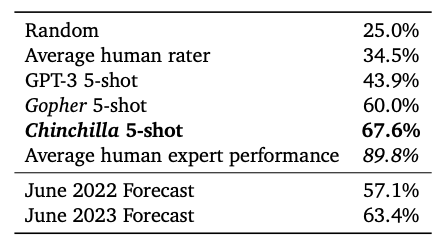

5. (5 points) According to the paper's analysis, what are the implications for training a 1 trillion parameter model? Would this be compute-optimal with current practices? Explain using evidence from Table 3 of the paper.




**Answer:** For a 1 trillion parameter model, Table 3 reports that 1.27 x 10^26 FLOPs and 21.2 trillion tokens would be required. This corresponds to roughly 221 times the compute used for Gopher (5.76 × 10^23 FLOPs), making such training impractical with current hardware. As a result, current practices would likely lead to undertraining, causing inefficient compute usage and suboptimal performance. According to Hoffmann et al., this reflects a broader issue that models are often oversized relative to available data, and true compute-optimal scaling would require increasing both model size and data proportionally.